## Problem Statement

Suppose that we have a fairly new application being developed. This new app is simply a mobile application that tracks the all of the users activity such as browsing and shopping activity.

The app development team has asked you to take some data from the app and extract some meaning from it. They were also interested in trying to possibly predict user behavior based on the usage data in the data they provided. For any given user, they want to see if they can use a snapshot of what that person has done at this particular time and predict what they are doing.



In this notebook, we would like to see how you would approach solving this problem. The data is provided in the `data` directory as `train.csv` and `test.csv`, so do what you will with this dataset to address the request of the app development team. Good luck and have fun!

## Environment Setup

In [121]:
# standard packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# feel free to add any additional packages you feel you may need
#from sklearn import ...
#import tensorflow as tf ...

In [125]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### QUESTION

- What are some considerations for the nature of the dataset that you can initially explore?
- Can you show what you would like to explore regarding the dataset as presented?

I will first see the how my data looks like using .head().I found a column mentionaing the ID and 561 features. In the later part, 'activity. I'm taking it as a classifier target variable.'I found that Then I checked for the nulls values . I did  not found single null value. This is a good sign. Using the .dtypes , I checked the columns datatypes.

In [126]:
#code
train_data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,3368.0,0.283100,-0.025501,-0.111181,-0.374477,-0.099568,-0.202966,-0.376311,-0.150160,-0.181695,...,0.515315,0.274885,-0.219945,0.670243,0.889311,0.463634,-0.759790,0.140485,0.185921,1.0
1,3369.0,0.207268,-0.016957,-0.093808,-0.325015,-0.123625,-0.216765,-0.332536,-0.174165,-0.203505,...,0.361673,0.016422,0.944645,0.602126,0.807218,-0.111752,-0.761524,0.142055,0.184160,1.0
2,3370.0,0.204876,-0.015669,-0.090056,-0.335084,-0.097665,-0.219217,-0.344267,-0.148851,-0.198500,...,0.649758,0.524121,0.916242,0.195366,0.811747,-0.261836,-0.759405,0.141793,0.185818,1.0
3,3371.0,0.240694,-0.031415,-0.106110,-0.326436,-0.066271,-0.198563,-0.332613,-0.105966,-0.166404,...,0.363503,0.149105,0.468444,-0.685859,0.431864,-0.366446,-0.757073,0.142311,0.187396,1.0
4,3372.0,0.270451,-0.013930,-0.100331,-0.309422,-0.017289,-0.160874,-0.314171,-0.052547,-0.117058,...,0.257787,-0.081213,0.440825,-0.794300,0.708809,-0.169292,-0.749242,0.145072,0.192380,1.0


In [127]:
test_data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_552,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561
0,1.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,2.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,3.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,4.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,5.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [128]:
print(train_data.isnull().sum())

ID             0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
              ..
feature_533    0
feature_534    0
feature_535    0
feature_536    0
feature_537    0
feature_538    0
feature_539    0
feature_540    0
feature_541    0
feature_542    0
feature_543    0
feature_544    0
feature_545    0
feature_546    0
feature_547    0
feature_548    0
feature_549    0
feature_550    0
feature_551    0
feature_552    0
feature_553    0
feature_554    0
feature_555    0
feature_556    0
feature_557    0
feature_558    0
feature_559    0
feature_560   

In [129]:
train_data.dtypes

ID             float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
                ...   
feature_533    float64
feature_534    float64
feature_535    float64
feature_536    float64
feature_537    float64
feature_538    float64
feature_539    float64
feature_540    float64
feature_541    float64
feature_542    float64
feature_543    float64
feature_544    float64
feature_545

### QUESTION

- What algorithms would be appropriate for the provided problem and why?

I'll apply the various classifiers algorithms with choosing significant features since by using coorelation. Selecting few features on the basis of +ve and -ve coorelation will make our algorithm much faster and will not overfit the data in comparison to selecting all the features.
Choices of Algorithms:
  
 **1.Support Vector Machine**
  
 **2.K-Nearest Neighbor**
  
 **3.Decision tree**
  
 **4.Naive Bayes**

In [130]:
#Finding the coorelation 
train_data[train_data.columns[1:]].corr()['activity'][:].sort_values()

feature_105   -0.867392
feature_103   -0.861578
feature_104   -0.855969
feature_368   -0.853138
feature_235   -0.850748
feature_185   -0.848682
feature_367   -0.847063
feature_369   -0.842486
feature_289   -0.838673
feature_290   -0.835074
feature_429   -0.832347
feature_126   -0.831807
feature_448   -0.831683
feature_524   -0.829583
feature_129   -0.826182
feature_288   -0.825200
feature_432   -0.824907
feature_261   -0.817485
feature_550   -0.815461
feature_88    -0.814711
feature_447   -0.814048
feature_273   -0.813195
feature_349   -0.811636
feature_426   -0.810488
feature_101   -0.809882
feature_85    -0.809472
feature_267   -0.809064
feature_435   -0.808374
feature_5     -0.808299
feature_352   -0.807875
                 ...   
feature_52     0.552645
feature_43     0.556795
feature_55     0.557839
feature_375    0.561344
feature_34     0.586348
feature_59     0.598321
feature_114    0.599509
feature_174    0.602723
feature_26     0.603733
feature_156    0.622677
feature_559    0

In [132]:
#CODE
#Transforming out train and test data according to our need!
train_data1=train_data[['ID','feature_10','feature_103','feature_104','feature_368','feature_235','feature_185'
                      ,'feature_367' ,'feature_369','feature_289','feature_290','feature_429','feature_126'
                      ,'feature_448','feature_524','feature_129','feature_288','feature_432','feature_261'
                      ,'feature_550','feature_88','feature_447','feature_273','feature_349','feature_426'
                      ,'feature_101','feature_85','feature_267','feature_435','feature_5','feature_352'
                      ,'feature_52','feature_43','feature_55','feature_375','feature_34','feature_59','feature_114'    
                      ,'feature_174','feature_26','feature_156','feature_559','feature_373'    
                      ,'feature_106','feature_54','feature_51', 'feature_42','feature_133','feature_154',
                      'feature_134','feature_194' ,'feature_173','feature_175','feature_95',  
                      'feature_15','feature_13' ,'feature_14' ,'feature_94','feature_93',
                       'feature_135','activity']]
test_data1=test_data[['ID','feature_10','feature_103','feature_104','feature_368','feature_235','feature_185'
                      ,'feature_367' ,'feature_369','feature_289','feature_290','feature_429','feature_126'
                      ,'feature_448','feature_524','feature_129','feature_288','feature_432','feature_261'
                      ,'feature_550','feature_88','feature_447','feature_273','feature_349','feature_426'
                      ,'feature_101','feature_85','feature_267','feature_435','feature_5','feature_352'
                      ,'feature_52','feature_43','feature_55','feature_375','feature_34','feature_59','feature_114'    
                      ,'feature_174','feature_26','feature_156','feature_559','feature_373'    
                      ,'feature_106','feature_54','feature_51', 'feature_42','feature_133','feature_154',
                      'feature_134','feature_194' ,'feature_173','feature_175','feature_95',  
                      'feature_15','feature_13' ,'feature_14' ,'feature_94','feature_93',
                       'feature_135']]



### QUESTION

- What results can be drawn from your exploration and modelling process?
- What is your ultimate choice with regard to final model and why?

Now I'll apply the four algorithms to get the best algorithm on the basis of accuracy of the algorithms! Choosing few features out of 562 features is far better as it will be good for space time tradeoff and will deliver the result.

I'll be selecting the model on the basis of accuracy of models.

In [133]:
# code
from sklearn.model_selection import train_test_split

predictors=train_data1.drop(['ID','activity'],axis=1)
target=train_data1['activity']
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.27,random_state=0)

In [134]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_cv)
acc_knn = round(accuracy_score(y_pred,y_cv) * 100, 2)
print(acc_knn)

96.58


In [135]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_cv)
acc_svc = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_svc)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


94.16


In [136]:
#NaiveBaiyes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_cv)
acc_nb = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_nb)

73.51


In [137]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_cv)
acc_dtc = round(accuracy_score(y_pred, y_cv) * 100, 2)
print(acc_dtc)

96.37


In [138]:
models = pd.DataFrame({
    'Method': ['KNN', 'SVM', 
              'NaiveBayes', 'Decision Tree'],
    'Score': [acc_knn, acc_svc, 
              acc_nb, acc_dtc]})
models.sort_values(by='Score', ascending=False)

,Method,Score
0,KNN,96.58
3,Decision Tree,96.37
1,SVM,94.16
2,NaiveBayes,73.51


### QUESTION

- How would you deploy the chosen algorithm? What were your considerations in making this decision?

I'll be using KNN and will check accuracy rate at various values of parameter! I'm using KNN as it has good accuracy rate test at vaiorus split in previous cells.It was almost same for KNN and Decision Tree but KNN is just slightly ahead.

In [143]:
# code
from sklearn.model_selection import cross_val_score
myList=list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

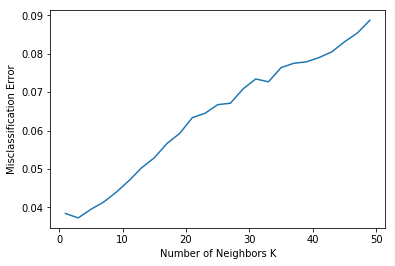

In [144]:
#Checking for the best K.
index=list(range(1,50,2))
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# plot misclassification error vs k
plt.plot(index, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
#Selecting K=3 as it has lowest error.

In [141]:
#Applying KNN to the test set!
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(test_data1.drop('ID',axis=1))
print(y_pred)

[5. 5. 5. ... 6. 6. 6.]


### QUESTION

- What are your overall conclusions to the problem? What have you made available and how can we use what was built?

We have just predicted the activity of test dataset by using our KNN model.
Conclusions:

  1.We can predict the activity of user by just having few significant features as it is provinding a good accuracy      rate.
  
  2.KNN model with clusters of 3 seems suitable to solve this problem as it is having lowest Misclassification Error
  
 **Availability**
 
 Now I'm creating a separate CSV which will be having the data of test_data and an addition column of 'activiy'        which we have just predicted. 
 
 **Usability**
 
 You can use this model to predict the user activity on the basis of their features
 


In [142]:
test_data['activity'] = y_pred

In [145]:
inaldf = pd.DataFrame(test_data)
inaldf.to_csv('predictions.csv', index=False, header=None)

In [146]:
test_data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,1.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5.0
1,2.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5.0
2,3.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5.0
3,4.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5.0
4,5.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5.0
